![Tensorflow](https://www.tensorflow.org/images/apple-touch-icon-180x180.png "Tensorflow")
# <u>_Linear Regression using Tensorflow and Tensorboard_</u>

> ### This is a simple ipython notebook explaining Linear Regression optimizing using _Tensorflow_ and visualizing using _Tensorboard_.

> First Step is to load all required library

In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn import datasets
%matplotlib inline

> #### Load the datasets from sklearn.datasets and shuffle the label and features together.

In [2]:
diabetes = datasets.load_diabetes()
diabetes = np.random.permutation(np.append(diabetes.data, diabetes.target.reshape(-1, 1), axis=1))

> #### Distribute whole dataset into train, test and cross validation in 70:10:20 percentage.

In [3]:
total_set = diabetes.shape[0]
train_set = int(0.7 * total_set)
test_set  = int(0.1 * total_set)
crv_set   = int(0.2 * total_set)

train_data  = diabetes[ : train_set, np.newaxis, 2]
train_label = diabetes[ : train_set, np.newaxis, 10]

#to be used in later push
test_data   = diabetes[ train_set: -crv_set, : 2]
test_label  = diabetes[ train_set: -crv_set, 10]

crv_data    = diabetes[ train_set+test_set: , 2]
crv_label   = diabetes[ train_set+test_set: , 10]

> #### Define some constants learning Rate, No. of iterations etc.

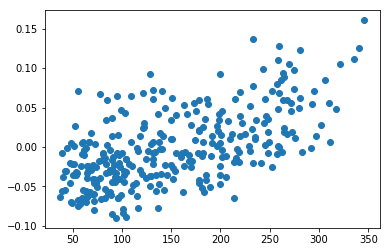

In [4]:
m, features = train_data.shape

l_rate = 0.5
epoch = 1000

#viz the training data
plt.plot(train_label, train_data, 'o')
plt.show()

> #### This is our Tensorflow model as will be visible in Tensorboard Graph. All nodes are under some coustom name space to visualize clean graph.

In [5]:
X = tf.placeholder(tf.float32, name="input_X")
Y = tf.placeholder(tf.float32, name="input_Y")

W = tf.Variable(tf.zeros([features,1]), name="weight")
b = tf.Variable(tf.zeros([1]), name="bias")

with tf.name_scope("predicted_Y"):
    y_ = tf.add(tf.matmul(X, W), b)

#Our Model - Linear Regression
with tf.name_scope("loss_function"):
    loss = tf.reduce_mean(tf.square(y_ - Y))
    tf.summary.scalar('loss', loss)
    
#Inbuilt gradient descent funtion
optimizer = tf.train.GradientDescentOptimizer(l_rate).minimize(loss)

#Initialize all above declared varaibles(Nodes)
init = tf.global_variables_initializer()

> #### This is summary writer, which will store data to disk for later visulazing in Tensorboard.

In [6]:
merge = tf.summary.merge_all()
writer = tf.summary.FileWriter("./diabetes/")

> #### This is Our main code Where all magic happens.

In [7]:
#Everything starts with a session in Tensorflow
m, c = (0,0)
with tf.Session() as sess:
    writer.add_graph(sess.graph)
    sess.run(init)
    #Training our Model
    for step in range(epoch):
        _, summ = sess.run([optimizer, merge], feed_dict={X: train_data, Y: train_label})
        #write every step data to disk
        writer.add_summary(summ, step)
    
    m = sess.run(W)
    c = sess.run(b)

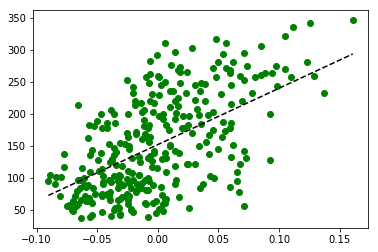

In [8]:
#final viz of fitted line
t = np.linspace(min(train_data), max(train_data), 50).reshape(-1, 1)
plt.plot(train_data, train_label, 'go')
plt.plot(t, t*m+c, 'k--' )
plt.show()